# Activity: Evaluate simple linear regression

## Introduction

In this activity, you will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, you will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.

## Step 1: Imports

### Import packages

Import relevant Python libraries and packages. In this activity, you will need to use `pandas`, `pyplot` from `matplotlib`, and `seaborn`.

In [1]:
# Import pandas, pyplot from matplotlib, and seaborn.

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Import the statsmodel module and the ols function

Import the `statsmodels.api` Python module using its common abbreviation, `sm`, along with the `ols()` function from `statsmodels.formula.api`. To complete this, you will need to write the imports as well.

In [2]:
# Import the statsmodel module.

import statsmodels.api as sm

# Import the ols function from statsmodels.

from statsmodels.formula.api import ols

### Load the dataset

`Pandas` was used to load the provided dataset `marketing_and_sales_data_evaluate_lr.csv` as `data`, now display the first five rows. This is a fictional dataset that was created for educational purposes. The variables in the dataset have been kept as is to suit the objectives of this activity. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###
data = pd.read_csv(r'C:\Users\saswa\Documents\GitHub\Python-For-Data-Analysis\Course-5\Data\shared_data\marketing_sales_data.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, you'll construct a simple linear regression model that predicts sales using a single independent variable. 

**Question:** What are some reasons for conducting an EDA before constructing a simple linear regression model?

**Exploratory Data Analysis (EDA) is conducted before building a simple linear regression model to ensure data quality and model reliability. Key reasons include:**

- **Checking Assumptions:** EDA helps verify if the data meets key assumptions for regression, allowing potential issues to be addressed before model construction.  
- **Understanding Data Structure:** It provides insights into the dataset, including variable distributions, summary statistics (mean, min, max), and overall patterns.  
- **Identifying Data Issues:** EDA helps detect missing values, outliers, and inconsistencies, ensuring data quality before modeling.  
- **Selecting Independent and Dependent Variables:** By visualizing relationships between variables, EDA aids in choosing the best predictor (X) for the dependent variable (Y).  
- **Preprocessing and Feature Engineering:** It includes data cleaning, transformation, and descriptive statistics to prepare the dataset for analysis.  


### Explore the data size

Calculate the number of rows and columns in the data.

In [4]:
# Display the shape of the data as a tuple (rows, columns).

data.shape

(572, 5)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is an attribute of a pandas DataFrame that returns the dimension of the DataFrame.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `shape` attribute of a DataFrame returns a tuple with the array dimensions.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.shape`, which returns a tuple with the number of rows and columns.

</details>

### Explore the independent variables

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, use `describe()` to generate descriptive statistics for these three variables.

In [5]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

data[['TV','Radio','Social Media']].describe()

,Radio,Social Media
count,571.000000,572.000000
mean,18.646472,3.248471
std,9.650740,2.195696
min,0.194576,0.013230
25%,10.878554,1.447163
50%,18.810430,2.945318
75%,25.838296,4.791290
max,48.871161,11.260430


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Subset `data` to only include the columns of interest.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Select the columns of interest using `data[['TV','Radio','Social_Media']]`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Apply `describe()` to the data subset.

</details>

### Explore the dependent variable

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [7]:
# Calculate the average missing rate in the sales column.

missing_sales=data.Sales.isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.

missing_sales=round(missing_sales*100,2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).

print(f"The percentage of missing value is: {missing_sales}%.")

# or

# print('Percentage of promotions missing Sales: ' +  str(missing_sales) + '%')

The percentage of missing value is: 0.17%.


**Question:** What do you observe about the percentage of missing values in the `Sales` column?

**The preceding output shows that 0.13% of rows are missing the `Sales` value.**  

The percentage of missing values in the `Sales` column is low, accounting for only 0.13% of the total 4,572 rows. This suggests that missing data is minimal and may not significantly impact the analysis.  


### Remove the missing data

Remove all rows in the data from which `Sales` is missing.

In [8]:
# Subset the data to include rows where Sales is present.

data = data.dropna(subset = ['Sales'], axis = 0)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about removing missing values from a DataFrame](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/rUXcJ/work-with-missing-data-in-a-python-notebook).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function may be helpful.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Apply `dropna()` to `data` and use the `subset` and `axis` arguments to drop rows where `Sales` is missing. 

</details>


### Visualize the sales distribution

Create a histogram to visualize the distribution of `Sales`.

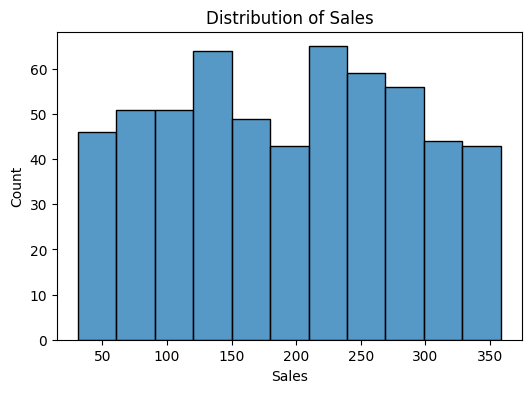

In [9]:
# Create a histogram of the Sales.

plt.figure(figsize=(6, 4))
fig=sns.histplot(data=data['Sales'])
# Add a title
fig.set_title('Distribution of Sales');

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a histogram.

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `histplot()` function from the `seaborn` library and pass in the `Sales` column as the argument.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To get a specific column from a DataFrame, use a pair of single square brackets and place the name of the column, as a string, in the brackets. Be sure that the spelling, including case, matches the data exactly.

</details>


**Question:** What do you observe about the distribution of `Sales` from the preceding histogram?

**The preceding histogram shows that `Sales` are generally distributed between 25 and 350 million.**  

The distribution appears fairly uniform, with sales values being relatively evenly spread across the range. The highest occurrence is around 150 million, while the lowest is around 350 million. This suggests that no extreme skewness is present in the data.  


## Step 3: Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help you select the X variable for the simple linear regression.

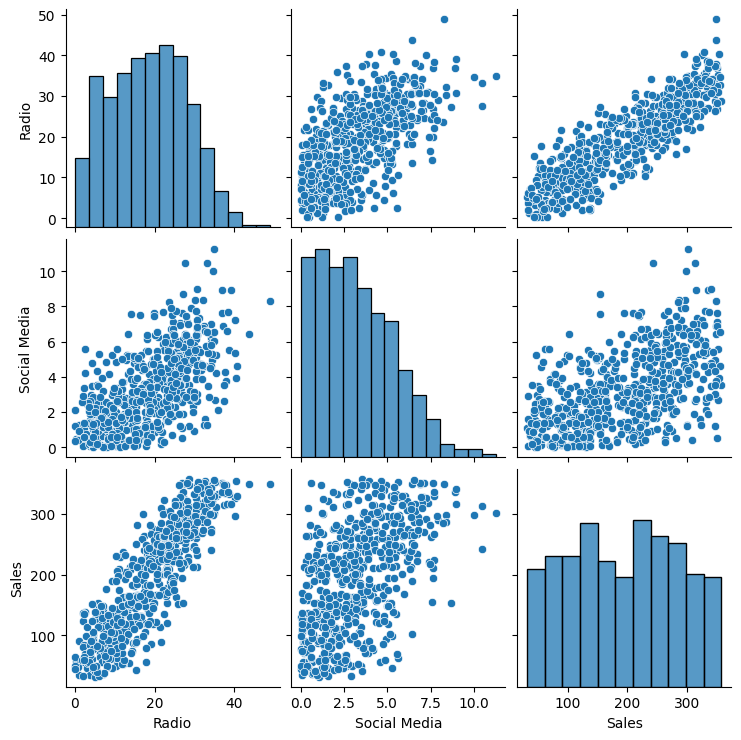

In [10]:
# Create a pairplot of the data.

sns.pairplot(data=data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the video where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/dnjWm/explore-linear-regression-with-python).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot that shows the relationships between variables in the data.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variable did you select for X? Why?

**The selected variable for X is `TV`.**  

`TV` has the strongest linear relationship with `Sales`, as observed in the scatterplot. A straight line can confidently estimate `Sales` using `TV`, indicating a clear linear trend. While `Radio` also shows a linear relationship with `Sales`, it exhibits greater variance, making `TV` the better predictor.  


### Build and fit the model

Replace the comment with the correct code. Use the variable you chose for `X` for building the model.

In [11]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [12]:
ols_data=data[['TV','Sales']]

In [13]:
ols_data.head(10)

,TV,Sales
0,Low,90.054222
1,Medium,222.741668
2,Low,102.774790
3,High,328.239378
4,High,351.807328
5,High,261.966812
6,High,349.861575
7,Low,140.415286
8,High,264.592233
9,Low,55.674214


In [14]:
# Define the OLS formula.

ols_formula = "Sales ~ TV"

# Create an OLS model.

OLS=ols(formula=ols_formula,data=ols_data)

# Fit the model.

model=OLS.fit()

# Save the results summary.

model_results=model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1981.
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          1.52e-256
Time:                        18:16:29   Log-Likelihood:                -2783.4
No. Observations:                 570   AIC:                             5573.
Df Residuals:                     567   BIC:                             5586.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      300.5296      2.415    124.450      0.000     295.786     305.273
TV[T.Low]     -208.8827      3.323    -62.862      0.000    -215.409    -202.356
TV[T.Medium]  -101.5061      3.323    -30.548      0.000    -108.033     -94.979
==============================================================================
Omnibus:                      445.741   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.711
Skew:                          -0.042   Prob(JB):                     1.76e-08
Kurtosis:                       1.777   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Intercept: The intercept value doesn’t have a meaningful interpretation in this case since it’s based on a scenario where the TV budget is zero, which might not be realistic.
- Slope for TV: The positive coefficient for TV indicates that an increase in the TV budget leads to a significant increase in sales (approximately 3.561 million dollars for every 1 million increase in the TV budget).
- Statistical Significance: The slope for TV is statistically significant (p-value = 0.000), meaning there is a strong relationship between TV budget and sales. The intercept is not statistically significant (p-value = 0.209).
- Confidence Intervals: The confidence intervals for the TV coefficient are very narrow, showing high precision. However, the confidence interval for the intercept includes zero, meaning the intercept’s effect is uncertain.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the video where an OLS model is defined and fit](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/Gi8Dl/ordinary-least-squares-estimation).

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the [`ols()`](https://www.statsmodels.org/devel/generated/statsmodels.formula.api.ols.html) function imported earlier— which creates a model from a formula and DataFrame—to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Replace the `X` in `'Sales ~ X'` with the independent feature you determined has the strongest linear relationship with `Sales`. Be sure the string name for `X` exactly matches the column's name in `data`.

</details>

<details>
<summary><h4><strong>Hint 4</strong></h4></summary>

Obtain the model results summary using `model.summary()` and save it. Be sure to fit the model before saving the results summary. 

</details>

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

Create a scatterplot comparing the X variable you selected with the dependent variable.

Text(0.5, 1.0, 'Scatter Plot of TV vs. Sales')

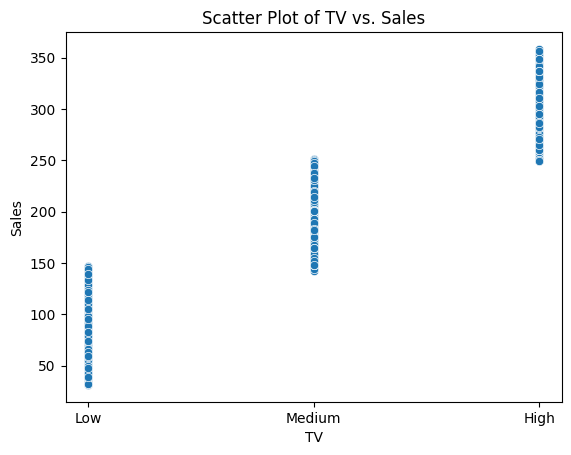

In [15]:
# Create a scatterplot comparing X and Sales (Y).

sns.scatterplot(x = 'TV', y = 'Sales',data=ols_data);
plt.title('Scatter Plot of TV vs. Sales')

DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

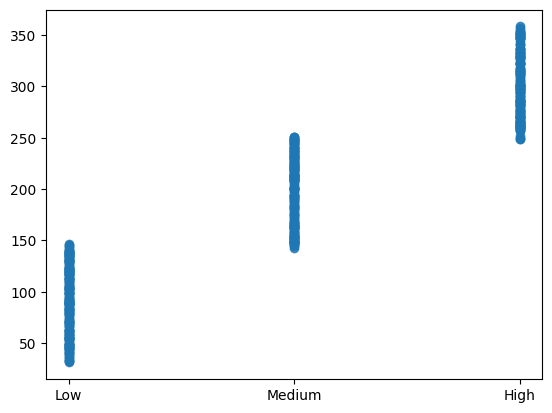

In [16]:
sns.regplot(x='TV',y='Sales',data=ols_data)
plt.title("Regression Plot of TV Budget vs. Sales")

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Pass the X and Y variables you chose for your simple linear regression as the arguments for `x` and `y`, respectively, in the `scatterplot()` function.

</details>

**QUESTION:** Is the linearity assumption met?

**Yes, the linearity assumption is met.**  

The scatterplot shows that the data points for `TV` and `Sales` cluster around the trend line, indicating a strong linear relationship. This suggests that `Sales` can be reliably predicted using `TV`, satisfying the linearity assumption.  


### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

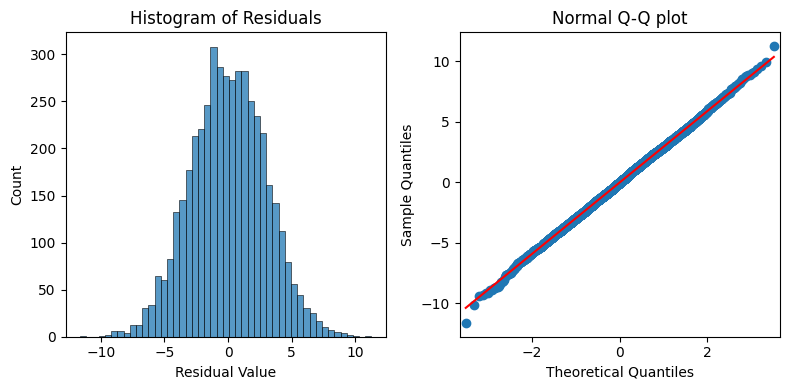

In [ ]:
# Calculate the residuals.

residuals=model.resid

# Create a 1x2 plot figures.

fig,axes=plt.subplots(1,2,figsize=(8,4))

# Create a histogram with the residuals. 

sns.histplot(data=residuals,ax=axes[0])

# Set the x label of the residual plot.

axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.

axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(data=residuals,line='s',ax=axes[1])

# Set the title of the Q-Q plot.

axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.

plt.tight_layout()

# Show the plot.

plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from the fit model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` [`qqplot()`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) function.

</details>

**Question:** Is the normality assumption met?

**Yes, the normality assumption is met.**  

The histogram of residuals shows an approximately normal distribution, indicating that the errors are symmetrically distributed. Additionally, the Q-Q plot displays residuals aligning closely with the theoretical quantiles, further supporting that the normality assumption holds for this model.  


### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

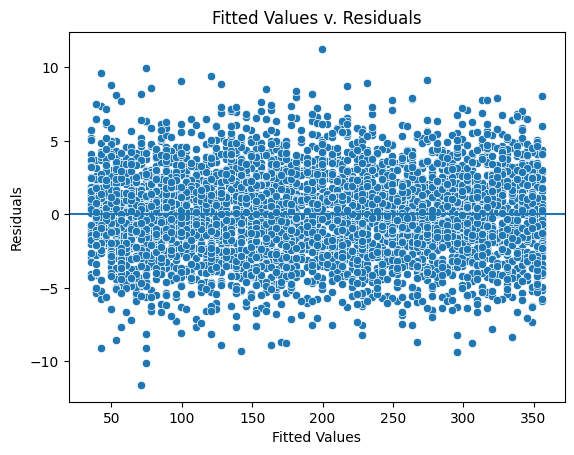

In [ ]:
# Create a scatterplot with the fitted values from the model and the residuals.

fitted_values=model.fittedvalues
fig=sns.scatterplot(x=fitted_values,y=residuals)

# Set the x-axis label.

fig.set_xlabel("Fitted Values")

# Set the y-axis label.

fig.set_ylabel("Residuals")

# Set the title.

fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

plt.axhline(0)

# Show the plot.

plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the `model` object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to the figure using the `axline()` function.

</details>

**QUESTION:** Is the homoscedasticity assumption met?

**Yes, the homoscedasticity assumption is met.**  

The variance of the residuals remains consistent across all values of `X`, indicating that the spread of errors does not change systematically. This supports the assumption of homoscedasticity.  


## Step 4: Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [ ]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:56:49   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?


**The R-squared value is high, indicating that a significant proportion of the variation in `Sales` is explained by `TV`.**  

With an $R^{2}$ value of 0.999, `TV` accounts for 99.9% of the variation in `Sales`. This suggests a strong relationship between `TV` and `Sales`, making `TV` a highly effective predictor in the model.  


### Interpret the model results

With the model fit evaluated, assess the coefficient estimates and the uncertainty of these estimates.

**Question:** Based on the preceding model results, what do you observe about the coefficients?

**Based on the model results, the coefficients provide the following insights:**

- **Intercept:** The intercept value of -0.1263 does not have a meaningful interpretation in this context, as it represents the sales when the TV budget is zero, which may not be a realistic scenario.
  
- **Slope for TV:** The positive coefficient of 3.5614 indicates that for every 1 million dollar increase in the TV budget, sales are expected to increase by approximately 3.561 million dollars. Alternatively, it can be interpreted as:  
  **"Companies with a 1 million dollar higher TV promotion budget are expected to generate 3.561 million dollars more in sales, on average."**  


**Question:** How would you write the relationship between X and `Sales` in the form of a linear equation?

**The relationship between `TV` and `Sales` can be written in the form of a linear equation as follows:**

$Y = \text{Intercept} + \text{Slope} * X$

$\text{Sales (in millions)} = \text{Intercept} + \text{Slope} * \text{TV (in millions)}$

$\text{Sales (in millions)} = -0.1263 + 3.5614 * \text{TV (in millions)}$


**Question:** Based on this model, what is your interpretation of the relationship between X and `Sales`?


**Based on the model, the relationship between `TV` and `Sales` can be interpreted as follows:**

For every 1 million dollar increase in the TV promotional budget, sales are estimated to increase by 3.5614 million dollars. This suggests a strong positive relationship between the TV budget and sales.  


**Question:** Why is it important to interpret the beta coefficients?

**Interpreting the beta coefficients is important because:**

Beta coefficients help estimate the magnitude and direction (positive or negative) of the effect each independent variable has on the dependent variable. By interpreting these coefficients, we can gain valuable insights into how changes in independent variables, like TV promotional budgets, impact the dependent variable, such as sales.

These coefficients provide the foundation for the regression equation. Each coefficient offers individual interpretations, contributing to a deeper understanding of the relationships in the data and enabling the generation of explainable insights.  


### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.

In [ ]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:56:49   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

**Based on this model, the interpretation of the p-value and confidence interval for the coefficient estimate of `TV` is as follows:**

- **Statistical Significance:** The p-value for the `TV` coefficient is 0.000, which indicates that the relationship between the TV budget and `Sales` is statistically significant. This means there is strong evidence to suggest that changes in the TV budget have a substantial impact on sales. On the other hand, the p-value for the intercept is 0.209, suggesting that the intercept is not statistically significant and its impact is uncertain.
  
- **Confidence Interval:** The 95% confidence interval for the TV coefficient is $[3.558, 3.565]$, which means we are 95% confident that the true value of the slope lies within this range. The narrow interval shows high precision in estimating the effect of `TV` on `Sales`. However, the confidence interval for the intercept includes zero, indicating uncertainty about its true value and suggesting that the intercept’s effect is less reliable.


**Question:** Based on this model, what are you interested in exploring?

**Based on this model, areas of interest to explore include:**

- **Exploring the impact of increasing the TV budget on sales:** Analyzing how further increases in the TV promotional budget might affect sales, and evaluating if the model holds with larger budget allocations.
  
- **Testing the model's accuracy with real-world data:** Investigating how well the model's predictions match actual sales data from the real world, assessing the generalizability and validity of the model.

Additionally, other areas could involve:
- **Using both `TV` and `Radio` as independent variables:** Exploring how a combination of these two variables might improve the model's predictive accuracy.
- **Adding visualizations:** Incorporating plots like the `seaborn` `regplot()` to visually present the data alongside the regression line, helping to better convey the results to stakeholders.  


**Question:** What recommendations would you make to the leadership at your organization?

**Recommendation to the leadership:**

Based on the model results, TV has the strongest positive linear relationship with sales. An increase of one million dollars in the TV promotional budget is estimated to result in an additional 3.5614 million dollars in sales, with a very high level of confidence as indicated by the small p-value. Therefore, I would recommend that the organization prioritize increasing the TV promotional budget to maximize sales.

However, it is also important to consider other promotional channels like radio, which also show a positive relationship with sales, although to a lesser extent than TV. A balanced investment in both TV and radio could potentially yield the best return on investment.


## Considerations

**What are some key takeaways that you learned from this lab?**

**Key Takeaways from this lab:**

- Exploratory Data Analysis (EDA) is a critical step in identifying a suitable independent variable (X) for a simple linear regression model.
- It is essential to verify that the assumptions of simple linear regression are met before interpreting the results of the model.
- R-squared provides valuable insight into the prediction error and how well the model explains the variation in the dependent variable.
- Providing uncertainty measures, such as p-values and confidence intervals, alongside coefficient estimates is important for understanding the reliability of the model.

**Additional insights I learned:**

- Python alone can be effectively used to conduct EDA, following the PACE (Plan, Analyze, Construct, Execute) framework for regression.
- Libraries like `matplotlib.pyplot` and `seaborn` help visualize the data and check assumptions that can be validated before building the model.
- The `statsmodels` package plays a vital role in both visualization and the modeling process. Specifically, it helps in performing tasks related to linear regression, such as using Ordinary Least Squares (OLS) to minimize the sum of squared residuals (SSR), making the regression tasks more efficient.


**What findings would you share with others?**

**Findings to share with others:**

- Sales is relatively equally distributed between $25 million and $350 million across all promotional channels.
- In the data visualization, TV has the strongest linear relationship with sales. Radio and sales show a moderate linear relationship, but with more variance than TV and sales. Social media and sales show a weak linear relationship.
- When TV is used as the independent variable, the R-squared for the simple linear regression model estimating sales is 0.999, indicating an almost perfect fit of the model to the data.
- The coefficient for the intercept when TV is the independent variable is -0.1263, and the coefficient for TV is 3.5614, suggesting a strong positive relationship between TV and sales.
- The p-value for the coefficient of TV is 0.000, and the 95% confidence interval for this coefficient is [3.558, 3.565], indicating high statistical significance and low uncertainty in the estimated effect of TV on sales.

**Additional insights:**

- I would emphasize that the strong positive correlation between TV and sales is noteworthy, and this relationship should be further explored. Increasing the TV promotional budget may have a significant impact on sales, and it would be valuable to investigate this further for business strategy.


**How would you frame your findings to stakeholders?**

**How I would frame the findings to stakeholders:**

- **Key Relationship:** Among TV, social media, and radio, TV shows the strongest positive relationship with sales, making it the most effective promotional channel based on the data.
  
- **Explaining Variability in Sales:** The linear regression model estimates that 99.9% of the variation in sales can be explained by the TV promotional budget. This means that the TV budget alone is a highly reliable predictor of sales performance.

- **Impact of TV Budget:** The model suggests that for every additional one million dollars spent on TV promotions, sales are expected to increase by approximately 3.5614 million dollars.

- **Confidence in Estimate:** The confidence interval for this estimate is between 3.558 million and 3.565 million, which means there is a 95% probability that the true increase in sales lies within this range. This gives a very high level of confidence in the accuracy of this estimate.

**How I would present this:**

- I would use simple, clear visualizations to show the relationship between TV budget and sales, explaining the key findings in a way that avoids technical jargon.
- Emphasizing the strong positive correlation between TV promotional budget and sales would be the focal point, demonstrating that investing in TV promotion could significantly boost sales.


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

Dale, D.,Droettboom, M., Firing, E., Hunter, J. (n.d.). [*Matplotlib.Pyplot.Axline — Matplotlib 3.5.0 Documentation*](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axline.html). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.